In [20]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [21]:
match=pd.read_csv('matches.csv')

In [22]:
delivery=pd.read_csv('deliveries.csv')


In [23]:
#1PURPLE CAP

In [24]:
x=match[['id','season']]

In [25]:
x_x=x.merge(delivery,left_on='id',right_on='match_id')

In [26]:
top=x_x.groupby(['season','bowler'])['player_dismissed'].agg('count').reset_index().sort_values('player_dismissed',ascending=False)

In [27]:
pur=top.drop_duplicates('season',keep='first')

In [36]:
pur=pur.sort_values('season' ,ascending=False)
lista=pur[['bowler','season']]


1049          B Kumar
939           B Kumar
848          DJ Bravo
780         MM Sharma
629          DJ Bravo
537          M Morkel
447        SL Malinga
284           PP Ojha
174          RP Singh
84      Sohail Tanvir
Name: bowler, dtype: object

In [10]:
#5.umpire having max no of matches


In [11]:
um=match['umpire1'].value_counts()

In [12]:
um1=match['umpire2'].value_counts()

In [13]:
max_match_ump=um+um1

In [14]:
max_match_ump=max_match_ump.sort_values(ascending=False).head(1)
max_match_ump

HDPK Dharmasena    87.0
dtype: float64

In [15]:
#10.team wise record

In [16]:
k=match['winner'].value_counts().reset_index().sort_values('index')

# 

In [17]:
l=match['team1'].value_counts()+match['team2'].value_counts()
l=l.reset_index()

In [18]:
new=k[['index','winner']]

In [19]:
n1=new.merge(l,left_on='index',right_on='index')

In [20]:
n1=n1.sort_values('winner',ascending=False)

In [21]:
n1.columns=['team','win_match','total_match']

In [22]:
n1

,team,win_match,total_match
7,Mumbai Indians,92,157
0,Chennai Super Kings,79,131
6,Kolkata Knight Riders,77,148
12,Royal Challengers Bangalore,73,152
4,Kings XI Punjab,70,148
9,Rajasthan Royals,63,118
2,Delhi Daredevils,62,147
13,Sunrisers Hyderabad,42,76
1,Deccan Chargers,29,75
3,Gujarat Lions,13,30


In [23]:
#2.team analysis wickets taken per over by bowling team

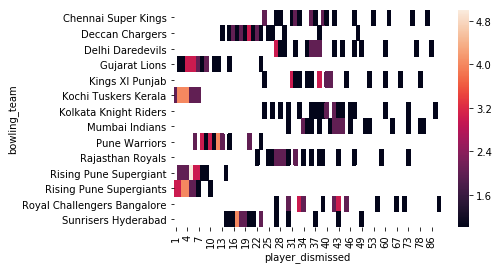

In [24]:
a=delivery
team_performance=a.groupby(['over','bowling_team'])['player_dismissed'].agg(lambda x: x.count()).reset_index().sort_values('player_dismissed',ascending=False)
team_performance=team_performance.sort_values(['bowling_team','over'])
ptable1=team_performance.pivot_table(values='over',index='bowling_team',columns='player_dismissed',aggfunc='count')
sns.heatmap(ptable1)

In [25]:
#3.best strike rate of BATSMAN IN DEATH overs(min 50 balls)

In [32]:
b=delivery['over']>=17
b=delivery[b]
t=b.groupby('batsman')[['batsman_runs']].agg(lambda x: x.sum()).reset_index().sort_values('batsman_runs' ,ascending=False)
d=b.groupby('batsman')[['ball']].agg(lambda x: x.count()).reset_index().sort_values('ball' ,ascending=False)
d['strike_rate']=(t['batsman_runs']/d['ball'])*100
e=d['ball']>=50
best_batsman_in_death_overs=d[e].sort_values('strike_rate',ascending=False)
best_batsman_in_death_overs.head(10)

,batsman,ball,strike_rate
20,AB de Villiers,409,221.271394
74,CH Gayle,133,208.270677
60,BB McCullum,78,202.564103
340,SN Khan,61,198.360656
184,KP Pietersen,56,196.428571
380,V Kohli,374,193.582888
90,DA Miller,270,192.962963
291,RG Sharma,539,192.949907
63,BCJ Cutting,54,192.592593
179,KK Nair,71,191.549296


In [27]:
#8 top fielders in term of catches

In [28]:
top_fielders=delivery.groupby('fielder')['dismissal_kind'].agg(lambda x: (x!='NaN').sum()).reset_index().sort_values('dismissal_kind',ascending=False)
top_fielders.columns=[['fielder','catches']]
top_fielders.head(10)

,fielder,catches
189,KD Karthik,127
252,MS Dhoni,126
337,RV Uthappa,115
17,AB de Villiers,101
365,SK Raina,96
281,PA Patel,84
271,NV Ojha,82
320,RG Sharma,79
20,AC Gilchrist,75
422,V Kohli,74


In [29]:
#7 TOP_BOWLER (on the basis of economy rate in death over)

In [30]:
b=delivery['over']>=17
b=delivery[b]
t=b.groupby('bowler')[['total_runs']].agg(lambda x: x.sum()).reset_index().sort_values('total_runs' ,ascending=False)
d=b.groupby('bowler')['ball'].agg(lambda x: x.count()).reset_index().sort_values('ball' ,ascending=False)
d['economy']=(t['total_runs']/d['ball'])*6
e=d['ball']>=60
d[e].sort_values('economy').head(10)


,bowler,ball,economy
252,Sohail Tanvir,98,6.734694
238,SP Narine,509,7.438114
71,DE Bollinger,216,7.444444
233,SL Malinga,891,7.569024
48,BA Stokes,65,7.753846
275,WD Parnell,170,7.764706
151,MA Starc,198,7.818182
4,A Kumble,112,7.928571
169,Mustafizur Rahman,149,7.932886
94,Harbhajan Singh,178,8.089888


In [106]:
#6.heatmap for top_20_batsman vs top_20_bwler 

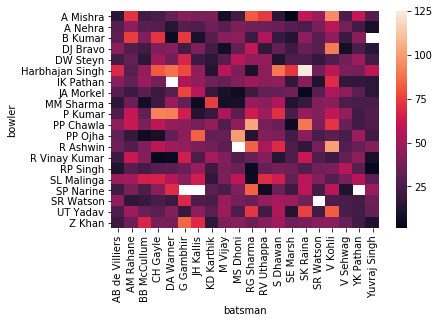

In [107]:
best_bat=delivery.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values('batsman_runs',ascending=False)
best_bat=best_bat.head(20)
best_bowl=delivery.groupby('bowler')['player_dismissed'].agg('count').reset_index().sort_values('player_dismissed',ascending=False)
best_bowl=best_bowl.head(20)
best_vs_best=delivery.merge(best_bowl, on='bowler')
best_vs_best=best_vs_best.merge(best_bat,on='batsman')
best_vs_best.groupby(['bowler','batsman'])['batsman_runs_x'].agg('count').reset_index().sort_values('batsman_runs_x',ascending=False)
ptable2=best_vs_best.pivot_table(values='batsman_runs_x',index='bowler',columns='batsman',aggfunc='count')
sns.heatmap(ptable2)
